# Build Model

## Split

In [23]:
# Split
y = df['#Passengers']
cutoff_split = int(len(y)*0.8)
y_train = y.iloc[:cutoff_split]
y_test = y.iloc[cutoff_split:]

## Baseline

In [24]:
# Base MSE
y_pred_baseline = [y_train.mean()]*len(y_train)
y_train_mse = mean_squared_error(y_train, y_pred_baseline)
print(f'Base MSE: {y_train_mse}')

Base MSE: 8271.858147448016


## Iterate

In [25]:
# Find the best parameters using Auto Arima but based on our potential model
arima = auto_arima(y_train,
                   start_p=0, max_p= 1,
                   d=1, max_d= 1,
                   start_q=0, max_q= 1,
                   start_P=0, max_P= 1,
                   D=1,max_D= 1,
                   start_Q=0, max_Q= 1,
                   m=12,
                   seasonal=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=False,
                   n_fits=100,
                   trace=True
                   )

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.826, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=756.988, Time=0.12 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=756.959, Time=0.15 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=758.922, Time=0.28 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=756.011, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=756.380, Time=0.13 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=756.166, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=758.107, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=755.499, Time=0.04 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=755.982, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=755.750, Time=0.11 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=757.649, Time=0.20 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=756.022, Time=0.07 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=756.629, Time=0.20 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=756.406, Time=0.17 sec
 ARIMA(1,1

In [26]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -375.750
Date:                            Sun, 13 Aug 2023   AIC                            755.499
Time:                                    04:46:54   BIC                            760.749
Sample:                                01-01-1949   HQIC                           757.625
                                     - 07-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2048      0.090     -2.271      0.023      -0.382      -0.028
sigma2        92.6974     13.326      6.956      0.000      66.579     118.816
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.44
Prob(Q):                              0.87   Prob(JB):                         0.30
Heteroskedasticity (H):               0.96   Skew:                             0.37
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
# Find the best parameters using Auto Arima but based on our potential model
free_arima = auto_arima(y_train,
                   start_p=0, max_p= 3, # Bigger range will let us find better but more complex model
                   d=1, max_d= 1,
                   start_q=0, max_q= 3,
                   start_P=0, max_P= 3,
                   D=1,max_D= 1,
                   start_Q=0, max_Q= 3,
                   m=12,
                   seasonal=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=False,
                   n_fits=100,
                   trace=True
                   )

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.826, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=756.988, Time=0.12 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=758.826, Time=0.42 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=758.186, Time=0.54 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=756.959, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=758.922, Time=0.13 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=754.685, Time=1.49 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=758.869, Time=0.16 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=760.726, Time=0.60 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.63 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=756.686, Time=1.83 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=759.643, Time=0.33 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=1.87 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=756.688, Time=2.32 sec
 ARIMA(0,1,1)(0,1,0)[1

In [28]:
free_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                          y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -370.278
Date:                                    Sun, 13 Aug 2023   AIC                            752.557
Time:                                            04:48:15   BIC                            768.307
Sample:                                        01-01-1949   HQIC                           758.934
                                             - 07-01-1958                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2218      0.093     -2.388      0.017      -0.404      -0.040
ar.S.L12       0.9288      0.275      3.374      0.001       0.389       1.468
ma.S.L12      -1.2065      0.448     -2.692      0.007      -2.085      -0.328
ma.S.L24       0.2771      0.174      1.596      0.111      -0.063       0.618
ma.S.L36       0.1251      0.164      0.765      0.444      -0.195       0.446
sigma2        75.0386     19.073      3.934      0.000      37.656     112.421
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.50
Prob(Q):                              0.91   Prob(JB):                         0.29
Heteroskedasticity (H):               1.05   Skew:                             0.37
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As expected, the "free" model has a higher accuracy (lower AIC indicates better fit), but it is also more complex (higher BIC indicates higher complexity).

I can do further evaluation but generally it's not worth the time, since the difference in accuracy is low. The decision of whether or not which would be the better model is more than just a simple trade-off between the model's accuracy and simplicity. Other factors such as domain expertise and context should be taken in account as well.

I will proceed with the simple model as it aligns with my ACF and PACF analysis.

<Axes: xlabel='Date'>

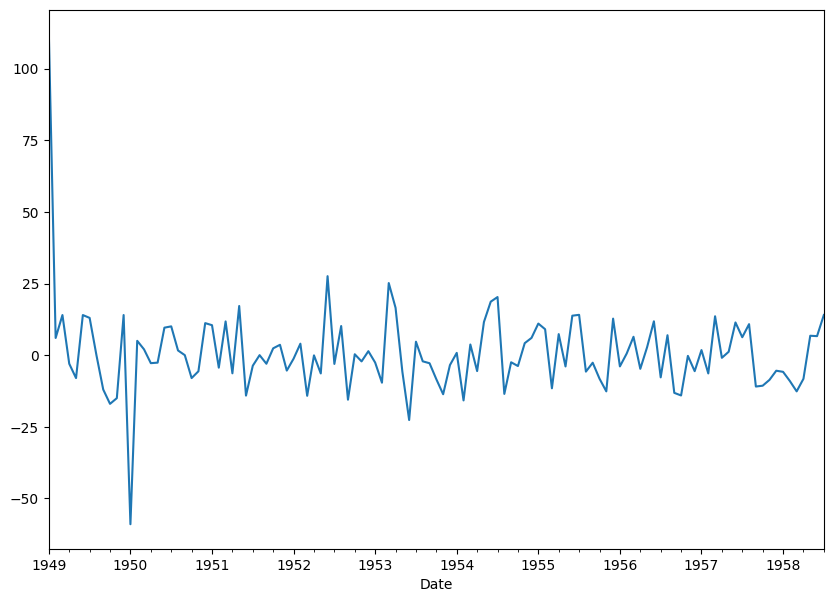

In [29]:
# Plot residuals to check for trends or patterns
arima.resid().plot(xlabel='Date')

The residuals plots look good as there is no trend or patterns.

## Evaluate

In [30]:
# Rolling validation (walk-forward validation)
test_size = int(len(y_test))
prediction = []
for i in range(test_size):
    train = y.iloc[:-(test_size-i)]
    model = SARIMAX(train, order=(1,1,0), seasonal_order=(0,1,0,12)).fit()
    next_pred = model.forecast(steps=1)
    prediction.append(next_pred.iloc[0])

y_wfv = pd.Series(prediction, index=y_test.index)
y_wfv.head()

Month
1958-08-01    490.337911
1958-09-01    439.772881
1958-10-01    355.658336
1958-11-01    314.133631
1958-12-01    342.701854
dtype: float64

In [31]:
# Comparison between models' MSEs and Baseline model's MSE
print(f'Base MSE: {round(y_train_mse, 2)}')

y_wfv_mse = mean_squared_error(y_test, y_wfv)
print(f'Test MSE: {round(y_wfv_mse, 2)}')

Base MSE: 8271.86
Test MSE: 301.0


# Communicate Results

In [32]:
# Create a DataFrame from y_test and y_wfv for easier comparison
y_test_and_pred = pd.DataFrame({
    'y_test': y_test,
    'y_wfv': y_wfv,
})
y_test_and_pred.head()

,y_test,y_wfv
Month,,
1958-08-01,505,490.337911
1958-09-01,404,439.772881
1958-10-01,359,355.658336
1958-11-01,310,314.133631
1958-12-01,337,342.701854


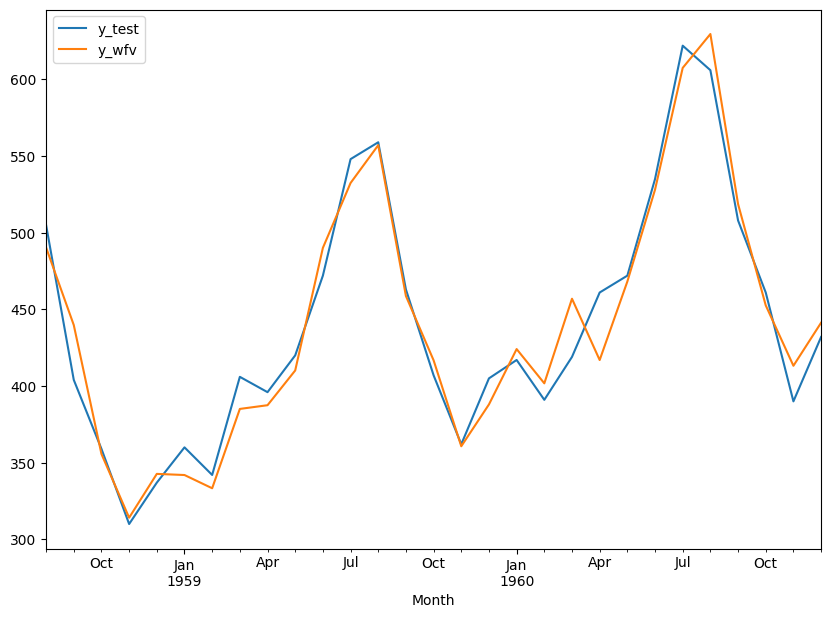

In [33]:
# Visual comparison of y_test and y_wfv
y_test_and_pred.plot()
plt.legend(loc='upper left');

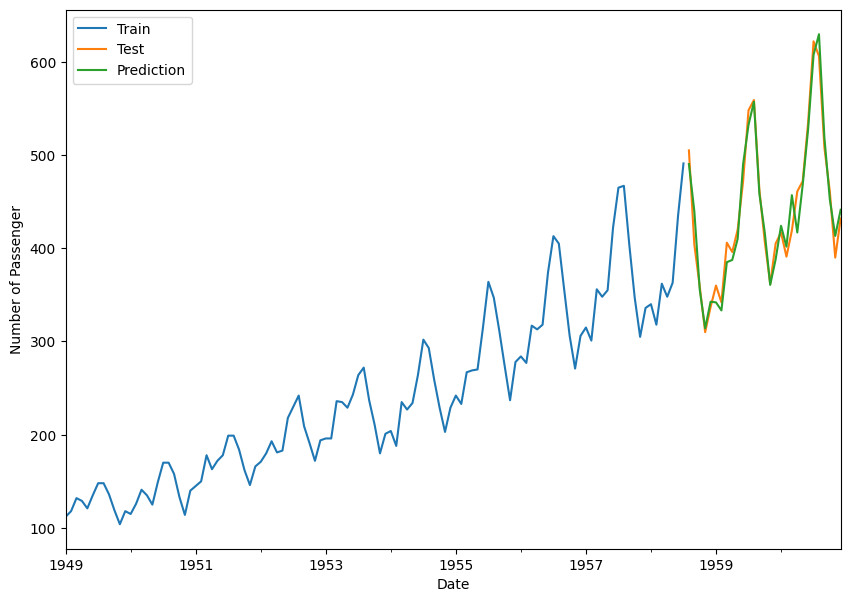

In [34]:
# Visualization of true data and model's prediction
plt.figure()
y_train.plot(label='Train')
y_test.plot(label='Test')
y_wfv.plot(label='Prediction')
plt.xlabel('Date')
plt.ylabel('Number of Passenger')
plt.legend();

# Save, Load, and Test Model

In [35]:
# Save model
model = SARIMAX(y_train, order=(1,1,0), seasonal_order=(0,1,0,12)).fit()
modelname = 'air_passenger_SARIMAX.pkl'
joblib.dump(model, modelname)

['air_passenger_SARIMAX.pkl']

In [36]:
# Load model
modelname = 'air_passenger_SARIMAX.pkl'
sarima_model = joblib.load(modelname)

In [37]:
# Test model
import datetime as dt
today = dt.datetime.now()
last_month = today - dt.timedelta(days=30)

from ts_predictor import Air_Passenger_Predictor # Load the predictor that we have defined in predictor.py
Air_Passenger_Predictor(modelname, last_month, today, return_series=True)

2023-08-01    2036.713050
2023-09-01    1974.258182
Freq: MS, Name: predicted_mean, dtype: float64